# Diode

## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.  
It also includes setting up the formatting parameters for the plots and visualizations.

### Import

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from tqdm.notebook import tqdm
from multiprocessing import Pool, cpu_count
from PySpice.Spice.Netlist import (
    Circuit, SubCircuitFactory
)
from PySpice.Unit import *
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Physics.SemiConductor import ShockleyDiode

### Formatting

Adjusting Plotly chart settings for clarity and consistency.

In [2]:
# ----  Formatting charts
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.edgecolor']  = "#bcbcbc"
mpl.rcParams['patch.linewidth'] = 0.5
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['axes.facecolor']  = "#eeeeee"
mpl.rcParams['axes.labelsize']  = "large"
mpl.rcParams['axes.grid']       = True
mpl.rcParams['grid.linestyle']  = "--"
mpl.rcParams['patch.edgecolor'] = "#eeeeee"
mpl.rcParams['axes.titlesize']  = "x-large"

## General Presentation

### Overview

A **diode** is one of the most essential components in electronics.
You can find it in almost every electronic circuit.

From a rigorous point of view, a diode is a **non-linear** and **polarized (asymmetric) dipole**.

* **Dipole** means it has only two terminals.
* **Non-linear** means its voltage–current relationship cannot be written as a linear equation of the form:
  $y = a \cdot x + b$.
* **Asymmetric (polarized)** means the orientation of the component in a circuit is important.

Although this might seem complex, diodes are actually quite simple to understand in practice.
In this section, we will first introduce the **standard diode**, then explore **other types of diodes**.


### Electrical Symbol

```{figure} ./images/Diode-EN_A-K.svg
:name: diode_symbol
:align: center
:width: 500px

Electrical symbol of a diode
```

The electrical symbol of a diode is simple: a **triangle** pointing toward a **bar**.
The triangle represents the **anode (A)** and the bar represents the **cathode (K)**.


### Operating Principle

The theoretical operation of a diode is straightforward.
It has two states:

1. **Forward-biased (conducting)** — the diode allows current to pass.
2. **Reverse-biased (blocked)** — the diode prevents current from flowing.

Whether the diode conducts or not depends on whether the voltage across it exceeds its **threshold voltage** ($V_\text{seuil}$ or $V_F$).
The following table summarizes this behavior:

|    Diode State | Condition & Description                                                         |
| -------------: | ------------------------------------------------------------------------------- |
|    **Blocked** | When $V_{AK} < V_\text{seuil}$, no current flows through the diode ($I_D = 0$). |
| **Conducting** | When $V_{AK} \ge V_\text{seuil}$, the diode conducts and $I_D \ne 0$.           |

```{figure} ./images/VfI_diode.svg
:name: diode_characteristic
:align: center
:width: 500px

Ideal diode I–V characteristic
```


### Key Parameters

| Symbol                      | Description                                                                          |
| :-------------------------- | :----------------------------------------------------------------------------------- |
| $V_\text{seuil}$ (or $V_F$) | Forward threshold voltage — the minimum voltage required to conduct.                 |
| $I_D$ (or $I_F$)            | Forward current — the current flowing through the diode from anode to cathode.       |
| $V_R$                       | Reverse voltage — the voltage across the diode when it is reverse-biased ($V_{KA}$). |

Typical values of the **threshold voltage** are:

* **0.3 V** for germanium diodes
* **0.7 V** for silicon diodes

### Shockley Equation

The current flowing through a diode can be expressed using the **Shockley diode equation**:

$$
I = I_0 \left[ \exp\left(\frac{V_j}{n V_0}\right) - 1 \right]
$$

where:

* $V_j$ — voltage across the diode
* $V_0$ — thermal voltage, given by
  $V_0 = \dfrac{k_B T}{e}$
  with:

  * $k_B$ — Boltzmann constant
  * $T$ — absolute temperature of the junction
  * $e$ — charge of an electron
  * $V_0 \approx 26\ \text{mV}$ at $T = 20^\circ\text{C}$ (293 K)
* $n$ — ideality factor (typically between 1 and 2)

  * $n = 1$ for small-signal diodes such as **1N4148**
* $I_0$ — reverse saturation current, specific to the diode type

> The Shockley equation is mainly used in detailed modeling or in analog circuit design (e.g., signal mixing or rectification analysis).

## Function ( V = f(i) )

### Objective

The goal of this experiment is to **visualize the relationship between voltage and current** in a diode.
To do this, we use a **simple circuit** composed of a **voltage source**, a **series resistor**, and a **diode** connected in series.

By gradually varying the voltage of the power supply, we can observe:

* how the **voltage across the diode** evolves, and
* how the **current through the circuit** changes accordingly.

### Experimental Setup

For this experiment, we use the **1N4004 diode**.
You can find its technical specifications in the following document:
[1N4004 Datasheet](https://www.mouser.fr/datasheet/3/101/1/1N4001-D.PDF)

```{figure} ./images/montage.svg
:name: diode_iv_setup
:align: center
:width: 500px

Experimental setup for measuring diode voltage–current characteristics
```

### Expected Behavior

As we **increase the generator voltage**:

* When the diode voltage is **below approximately 0.7 V**, the **current remains nearly zero** — the diode is **not conducting**.
* Once the voltage **exceeds the threshold voltage** (around 0.7 V for a silicon diode), the diode **starts to conduct**.
  At this point, it behaves approximately like a **constant voltage source** of **0.7 V**.

This experiment allows us to directly observe the **non-linear I–V characteristic** of a real diode and to identify the **threshold region** where conduction begins.

In [3]:
# ---------------------------------------------------------
# Circuit Definition
# ---------------------------------------------------------
circuit = Circuit('Diode I–V Characteristic')

# Include the diode model library (make sure the path is correct)
circuit.include('lib/diodes_standard-rectifiers.lib')

# Voltage source connected to node 'r' (anode of diode)
# This will be swept in the DC analysis
circuit.V('input', 'r', circuit.gnd, 0@u_V)

# Series resistor to limit current through the diode
circuit.R('load', 'r', 'd', 300@u_Ω)

# Diode connected between node 'd' and ground
# Model name must match the one defined in the .lib file
circuit.D(1, 'd', circuit.gnd, model='DI_1N4004GL')

.title Diode I–V Characteristic
.include C:\Users\sacha\Desktop\Python\Electronique\electronique_book\Base_componant\diode\lib\diodes_standard-rectifiers.lib
Vinput r 0 0V
Rload r d 300Ohm
D1 d 0 DI_1N4004GL



In [4]:
# ---------------------------------------------------------
# Simulation Settings
# ---------------------------------------------------------
V_min = -2     # Start voltage for sweep [V]
V_max = 1      # End voltage for sweep [V]
step = 0.01    # Voltage step [V]

# Create simulator instance
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

# Perform DC sweep of the input voltage source
analysis = simulator.dc(Vinput=slice(V_min, V_max, step@u_V))

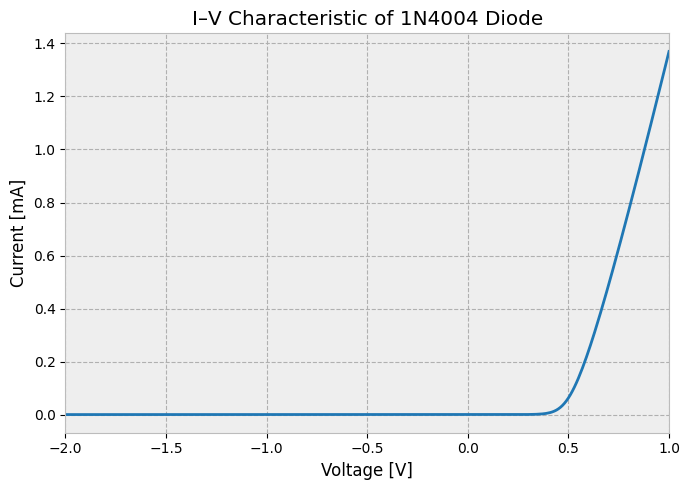

In [5]:
# ---------------------------------------------------------
# Data Extraction and Plotting
# ---------------------------------------------------------
# The current through the voltage source is negative (current entering the source)
I_diode = -analysis.branches['vinput']

# Plot the I–V curve of the diode
plt.figure(figsize=(7,5))
plt.plot(np.linspace(V_min, V_max, len(I_diode)), I_diode*1e3)
plt.title("I–V Characteristic of 1N4004 Diode")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")
plt.grid(True)
plt.xlim(-2, 1)
plt.tight_layout()
plt.show()

### Analysis of the Diode Phases

We can clearly distinguish the different operating regions of the diode from the I–V curve:

1. **Reverse and low forward voltage region** (approximately from –2 V to 0.5 V):
   The current is **very small**—not exactly zero, but extremely close to it.
   In this range, the diode is **essentially non-conducting**.

2. **Non-linear transition region** (around 0.5 V):
   Here, the curve becomes **exponential**, showing the **onset of conduction**.
   This is the typical **non-linear behavior** of the diode described by the Shockley equation.

3. **Linear region at higher voltages** (beyond the threshold):
   As the diode becomes fully forward-biased, the current increases **almost linearly**.
   This linear behavior is due to the **series resistance** present in the circuit.

To estimate the current flowing through the circuit, we can use the following approximation:

$$
I \approx \frac{V_e - V_\text{sat}}{R}
$$

where:

* $V_e$ — input (supply) voltage
* $V_\text{sat}$ — forward voltage of the diode (≈ 0.7 V for silicon)
* $R$ — series resistance in the circuit

## Explanation of the Diode Simulation File

### Defining a Diode in the Simulation

To create a diode in the simulation environment, you use the function `D`.
In the model, a diode is identified by a name such as `Dx` — for example, `D1`, `Da`, or `D101`.

The general syntax for defining a diode in a SPICE-based model is as follows:

```text
General form: D[name] [anode] [cathode] [model name]
```

Example:

```text
D1  N1  N2  Dmodel
```

This defines a diode named **D1**, connected between nodes **N1** (anode) and **N2** (cathode), using the model **Dmodel**. Ce qui donne en python la ligne suivant par exemple 

```python
circuit.D(1, 'd', circuit.gnd, model='DI_1N4004GL')
```

### Diode Model Parameters

The parameters used to describe the diode model are summarized in the table below:

| Symbol    | Name | Parameter Description                            | Units | Default |
| :-------- | :--- | :----------------------------------------------- | :---- | :------ |
| **IS**    | IS   | Saturation current (Shockley equation parameter) | A     | 1E-14   |
| **RS**    | RS   | Parasitic (series) resistance                    | Ω     | 0       |
| **n**     | N    | Emission coefficient (typically between 1 and 2) | –     | 1       |
| **τD**    | TT   | Transit time                                     | s     | 0       |
| **CD(0)** | CJO  | Zero-bias junction capacitance                   | F     | 0       |
| **φ₀**    | VJ   | Junction potential                               | V     | 1       |
| **m**     | M    | Junction grading coefficient                     | –     | 0.5     |
| –         | –    | 0.33 for linearly graded junction                | –     | –       |
| –         | –    | 0.5 for abrupt junction                          | –     | –       |
| **Eg**    | EG   | Activation energy                                | eV    | 1.11    |
| –         | –    | Silicon: 1.11                                    | –     | –       |
| –         | –    | Germanium: 0.67                                  | –     | –       |
| –         | –    | Schottky: 0.69                                   | –     | –       |
| **pi**    | XTI  | Temperature exponent of IS                       | –     | 3.0     |
| –         | –    | pn junction: 3.0                                 | –     | –       |
| –         | –    | Schottky: 2.0                                    | –     | –       |
| **kf**    | KF   | Flicker noise coefficient                        | –     | 0       |
| **af**    | AF   | Flicker noise exponent                           | –     | 1       |
| **FC**    | FC   | Forward-bias depletion capacitance coefficient   | –     | 0.5     |
| **BV**    | BV   | Reverse breakdown voltage                        | V     | ∞       |
| **IBV**   | IBV  | Reverse breakdown current                        | A     | 1E-3    |


### Notes

* These parameters define how the diode behaves under different operating conditions (forward bias, reverse bias, temperature changes, etc.).
* In most basic simulations, default values are sufficient, but for precision modeling (e.g., power or high-frequency diodes), adjusting these parameters is crucial.
* The model can be customized to represent **silicon**, **germanium**, or **Schottky** diodes, depending on the material and application.

## Simulation

The objective of this section is to understand **how SPICE performs diode simulations** and the meaning of the **main modeling parameters**.
The reference document for this part is: SPICE Diode Model Documentation.

### Large-Signal DC Model

To simulate this model, SPICE uses four main parameters:

* **IS** – reverse saturation current of an ideal diode
* **RS** – series resistance representing the contact metal and semiconductor resistance
* **N** – emission coefficient adjusting the slope of the I–V curve
* **BV** & **IBV** – parameters modeling the **reverse breakdown** behavior

```{figure} ./images/schema_equivalent_diode_dc.svg
:name: montage-equivalent-diode
:align: center
:width: 500px

DC Large-Signal SPICE Diode Model
```

The [](#montage-equivalent-diode) represents the diode under **DC conditions**.
In this equivalent model, we can identify the main diode (D_1), as well as two additional resistive elements:

1. A **series resistance** $R_S$, which represents the internal resistance of the diode
2. A **parallel conductance** $G_{\text{min}}$, which is very large (its equivalent resistance is very high)

```{warning}
Be careful — in this model, $G_{\text{min}}$ refers to the **conductance**, not the resistance.  
Since conductance is the inverse of resistance:

$$
G = \frac{1}{R}
$$

the value of $G_{\text{min}}$ must be **very small but not zero** to maintain numerical stability during SPICE simulations.
```

The **series resistance** $R_S$ is explicitly defined in the diode configuration file, for example:

```text
RS = 42.2m
```

```{danger}
I have not yet found a reliable way to **visualize the values of $R_S$ and $G_{\text{min}}$$** directly in the circuit diagram.
```

#### Determining the Forward Voltage

The forward voltage $V_F$ can be expressed as:

$$
V_F = R_S \cdot I_D + V_D
$$

and

$$
I_D = f(V_D)
$$

The goal of the next sections is to determine the **mathematical form of $I_D$** for each operating region of the diode.

#### (a) For $V_D \leq -5 \cdot N \cdot V_T$

$$
I_D = I_S \cdot \left( \exp{\left(\frac{V_D}{N \cdot V_T}\right)} - 1 \right) + G_{\text{min}} \cdot V_D
$$

```{important}
One may wonder what this limit $V_D \leq -5 \cdot N \cdot V_T$ represents.  
This can be explained by returning to the **ideal Shockley diode equation**:

$$
I = I_S \left(e^{\frac{V_D}{N V_T}} - 1\right)
$$

where:

- $I_S$ = reverse saturation current  
- $V_T = \frac{kT}{q} \approx 25.85 \text{ mV at } 300\text{ K}$  
- $N$ = ideality factor (typically between 1 and 2)

The term $N \cdot V_T$ defines a **characteristic voltage scale** marking the transition where the diode starts to enter its strong conduction region — where **parasitic effects** become dominant.  
The following table illustrates this progression:

| $V_D / (N V_T)$ | Exponential term $\exp{(V_D / (N V_T))}$ | Current behavior |
|-----------------|------------------------------------------|------------------|
| 0 → 1 | 1 → 2.7 | Very weak current |
| 2 → 3 | 7.4 → 20 | Weak current, rapidly increasing |
| 4 → 5 | 55 → 150 | Diode begins to conduct |
| 10 | 22,000 | Diode fully conducting |
| > 20 | 4.8 × 10⁸ | Numerical saturation (huge current) |
```

**Why the Limit Around $5 \cdot N \cdot V_T$**

This boundary marks the **transition region** between:

* the **exponential region** (low voltages, Shockley law dominant), and
* the **ohmic region** (higher voltages, dominated by (R_S)).

**In practice:**

* To observe **pure exponential behavior**, the simulation typically extends to ≈ (5 N V_T);
* Beyond this limit, the curve becomes **quasi-linear**, since (R_S) dominates;
* Numerically, (\exp(5) \approx 150), a safe range that avoids overflow in SPICE solvers.

---

#### (b) For $-\text{BV} < V_D < -5 \cdot N \cdot V_T$

$$
I_D = - I_{BV}
$$

In this range, the voltage does not exceed the **breakdown limit** (BV).
If the voltage were to drop below (BV), the diode would **enter breakdown** and could be damaged.
The exponential term (\exp{\left(\frac{V_D}{N V_T}\right)}) becomes extremely small (close to zero), so the simplified equation above applies.

```{note}
The term $G_{\text{min}} \cdot V_D$ helps maintain **numerical stability**, preventing the simulated current from becoming exactly zero.
```

In summary, in this region, $I_D \approx I_S$, which means the diode is effectively **saturated** and cannot conduct more current.

#### (c) For $V_D = -BV$

$$
I_D = -I_{BV}
$$

In this region, the diode is in **reverse breakdown** mode.
The current is limited by the breakdown current parameter $I_{BV}$, which represents the **maximum reverse current** the diode can safely conduct.

Physically, this means that once the reverse voltage $V_D$ exceeds the breakdown limit $BV$, the diode cannot block current anymore — it starts conducting heavily in the reverse direction.
However, in SPICE, the current is **clamped** to the fixed value $I_{BV}$ to prevent divergence and to model a realistic breakdown behavior.

```{note}
The parameter $I_{BV}$ is essential to ensure a smooth numerical transition between the **reverse saturation region** and the **breakdown region**.
```


#### (d) For $V_D < -BV$

$$
I_D = -I_{BV}
$$

In this case, the diode enters **reverse breakdown**.
The current is limited by (I_{BV}), which defines the maximum safe reverse current through the diode.

Alternatively, in SPICE’s extended model, this behavior is described more precisely as:

$$
I_D = I_S \left(\exp({\frac{-(BV + V_D)}{V_T}}) - 1 + \frac{BV}{V_T}\right)
$$

where the **breakdown contribution** is explicitly included in the exponential term.

#### Temperature Dependence

For all these equations, the **thermal voltage** (V_T) is defined as:

$$
V_T = \frac{k \cdot T}{q}
$$

where:

* (k) = Boltzmann constant
* (T) = absolute temperature (in Kelvin)
* (q) = elementary charge

---

```{attention}
To ensure smooth convergence between regions (c) and (d), \(I_{BV}\) must satisfy:

$$
I_{BV} \ge \frac{I_S \cdot BV}{V_T}
$$

This ensures numerical stability and continuity of the diode model in SPICE.
```

### Visualization of the Results

The purpose of this section is to **visualize the impact of temperature on the diodes** and to analyze **each part of the simulation**.

```{warning}
⚠️ The circuit used in this simulation contains only a diode and a voltage source.  
This configuration is extremely dangerous in a real setup. It should **only be used for simulation purposes**.  
In a real circuit, the current could quickly increase, causing **overheating**, **component damage**, or even **burns**.  
```

#### Visualization Area

In [1]:
# ---------------------------------------------------------
# Circuit Definition
# ---------------------------------------------------------
circuit = Circuit('Visualisation zone simulation')

# Include the diode model library (make sure the path is correct)
circuit.include('lib/diodes_standard-rectifiers.lib')

# Voltage source connected to node 'r' (anode of diode)
# This will be swept in the DC analysis
circuit.V('input', 'int', circuit.gnd, 0@u_V)

# Diode connected between node 'd' and ground
# Model name must match the one defined in the .lib file
circuit.R(1, 'int', 'out', 1@u_Ω)
circuit.D(1, 'out', circuit.gnd, model='DI_1N4004GL')

NameError: name 'Circuit' is not defined

In [24]:
# Constants and temperature
T_C = 25.0                 # Temperature in degrees Celsius
k = 1.3806e-23             # Boltzmann constant, J/K
q = 1.602e-19              # Elementary charge, C

# Convert Celsius to Kelvin
T_K = T_C + 273.15         # Kelvin

# Thermal voltage
V_T = k * T_K / q          # V_T = k*T / q

print(f"Temperature = {T_C} °C = {T_K:.2f} K")
print(f"Thermal voltage V_T = {V_T:.6f} V  ({V_T*1e3:.3f} mV)")

Temperature = 25.0 °C = 298.15 K
Thermal voltage V_T = 0.025694 V  (25.694 mV)


In [25]:
# Ideality factor from diode model
N = 1.36  
BV = 400

# Compute the lower voltage limit for the reverse region
negative_limit = -5 * N * V_T

# Display results
print("Determining the forward voltage region:")
print(f"Ideality factor (N): {N}")
print(f"Thermal voltage (V_T): {V_T:.6f} V ({V_T*1e3:.2f} mV)")
print(f"For (−5 × N × V_T) (−5 × N × V_T): {negative_limit:.4f} V")
print(f"For BV : {BV} V")

Determining the forward voltage region:
Ideality factor (N): 1.36
Thermal voltage (V_T): 0.025694 V (25.69 mV)
For (−5 × N × V_T) (−5 × N × V_T): -0.1747 V
For BV : 400 V


In [26]:
# ---------------------------------------------------------------
# Simulation parameters
# ---------------------------------------------------------------
temperatures = [0, 25, 100] @ u_Degree   # Temperatures in °C for simulation
analyses = {}                            # Store simulation results

In [27]:
# ---------------------------------------------------------------
# Run DC analysis for each temperature
# ---------------------------------------------------------------
for temperature in temperatures:
    # Create a simulator instance at each temperature
    simulator = circuit.simulator(
        temperature=temperature,
        nominal_temperature=temperature
    )

    # Perform a DC sweep on the input voltage from -2V to +5V
    analysis = simulator.dc(Vinput=slice(-2, 5, 0.01))
    analyses[float(temperature)] = analysis  # Store results

In [28]:
# ---------------------------------------------------------------
# Data preparation
# ---------------------------------------------------------------
Vd = analyses[25].out  # Use 25°C analysis as reference for x-axis

# Define scaling factors:
#   - In reverse region (V < 0): use nA scale (×1e11)
#   - In forward region (V ≥ 0): use mA scale (×1e3)
forward_region = Vd >= 0 @ u_V
reverse_region = np.invert(forward_region)
scale = reverse_region * 1e11 + forward_region * 1e3

# Typical silicon diode parameters
silicon_forward_voltage_threshold = 0.7  # [V]
shockley_diode = ShockleyDiode(Is=4e-9, degree=25)

In [29]:
# ---------------------------------------------------------------
# Custom y-axis formatter for mixed scale (nA / mA)
# ---------------------------------------------------------------
def two_scales_tick_formatter(value, position):
    """Format the y-axis depending on current direction."""
    if value >= 0:
        return f'{value:.0f} mA'
    else:
        return f'{value/100:.0f} nA'

formatter = ticker.FuncFormatter(two_scales_tick_formatter)

Should be unit less


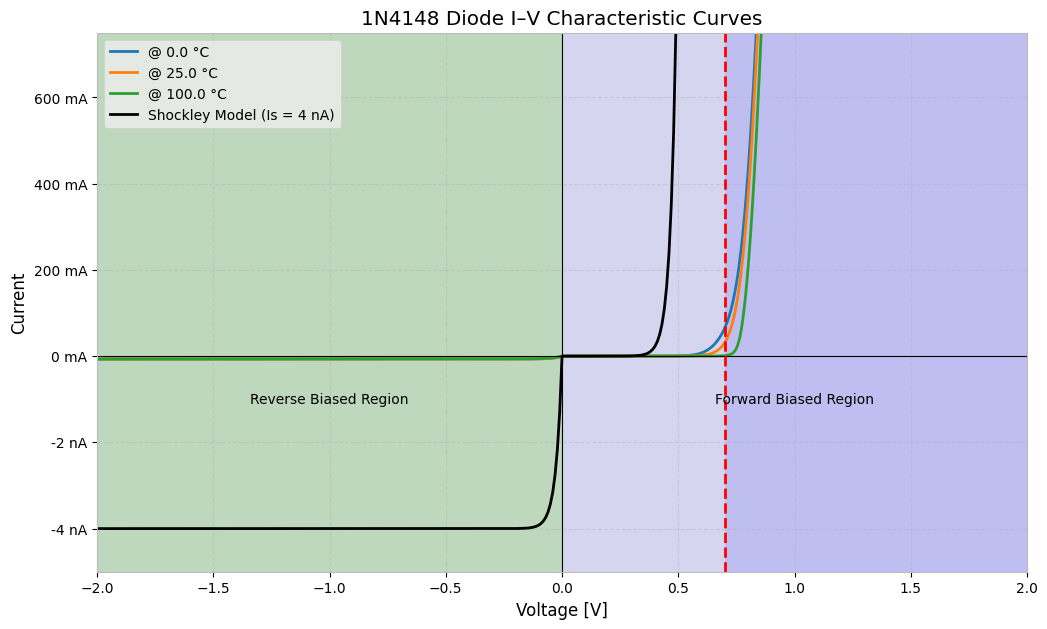

In [30]:
# ---------------------------------------------------------------
# Plot setup
# ---------------------------------------------------------------
figure, ax = plt.subplots(1, figsize=(12, 7))
ax.set_title('1N4148 Diode I–V Characteristic Curves')

# ---------------------------------------------------------------
# Plot simulation results for each temperature
# ---------------------------------------------------------------
for temperature in temperatures:
    analysis = analyses[float(temperature)]
    ax.plot(Vd, -analysis.Vinput * scale, label=f'@ {float(temperature)} °C')

# Plot ideal Shockley diode reference
ax.plot(Vd, shockley_diode.I(Vd) * scale, 'k', label='Shockley Model (Is = 4 nA)')

# ---------------------------------------------------------------
# Visual enhancements
# ---------------------------------------------------------------
# Highlight voltage regions
ax.axvspan(-2, 0, facecolor='green', alpha=0.2)
ax.axvspan(0, silicon_forward_voltage_threshold, facecolor='blue', alpha=0.1)
ax.axvspan(silicon_forward_voltage_threshold, 2, facecolor='blue', alpha=0.2)

# Add reference lines
ax.axvline(x=0, color='black', linewidth=0.8)
ax.axhline(y=0, color='black', linewidth=0.8)
ax.axvline(x=silicon_forward_voltage_threshold, color='red', linestyle='--')

# Annotate regions
ax.text(-1, -100, 'Reverse Biased Region', ha='center', va='center', fontsize=10)
ax.text(1, -100, 'Forward Biased Region', ha='center', va='center', fontsize=10)

# ---------------------------------------------------------------
# Axis and formatting
# ---------------------------------------------------------------
ax.set_xlabel('Voltage [V]')
ax.set_ylabel('Current')
ax.set_xlim(-2, 2)
ax.set_ylim(-500, 750)
ax.yaxis.set_major_formatter(formatter)
ax.legend(loc='upper left')

plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

### Temperature Influence on the Diode I–V Characteristic

There are several key observations to make from this graph, particularly regarding the **influence of temperature**.

The simulation was performed at **three different temperatures**:

* **0 °C** (blue curve)
* **25 °C** (orange curve)
* **100 °C** (green curve)

Temperature plays a **major role in the nonlinear region** of the diode’s characteristic curve.
As temperature increases, the **transition angle** between the blocked and conducting states becomes **steeper**, meaning the diode begins to conduct more easily.

Temperature also affects the **slope** of the curve, although this effect is not very noticeable in this plot - it becomes more visible in the detailed graphs shown below.
At **low current levels**, the impact of temperature is even more significant, because the **series resistance** $R_S$ of the diode becomes dominant.

The **black curve** represents the **analytical Shockley model** of an ideal diode, without taking into account the **series resistance $R_S$** or the **junction capacitance $C$**.
Although the scaling may differ slightly, we can observe that both models are **very similar**, except in the **forward-biased region**, where the influence of the **series resistance $R_S$** is no longer negligible.

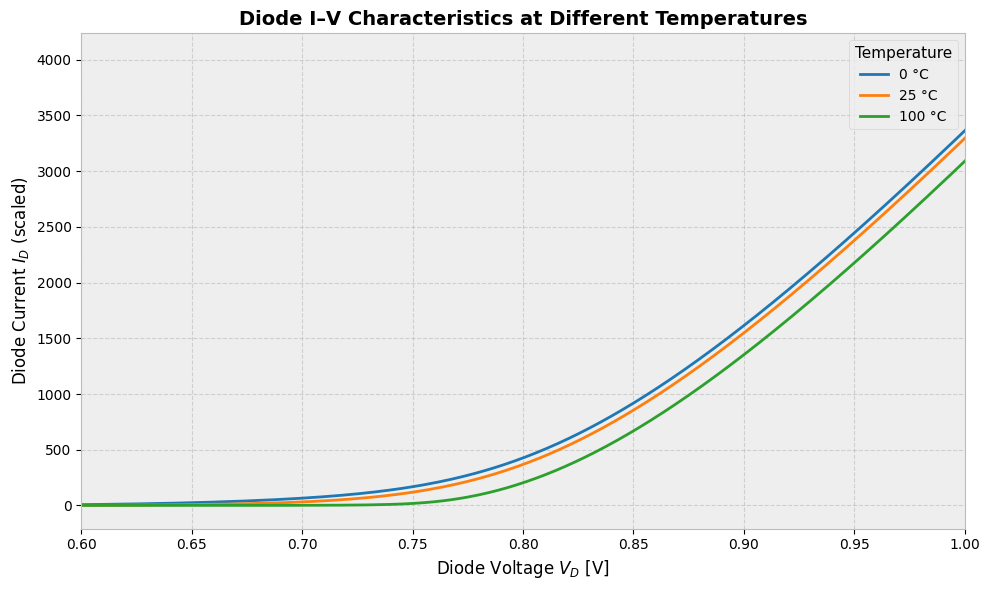

In [36]:
plt.figure(figsize=(10, 6))

# Loop over each temperature and plot its corresponding analysis
for temperature in temperatures:
    # Retrieve the analysis result for this temperature
    analysis = analyses[float(temperature)]
    
    # Compute the diode current (negative sign to get current direction consistent)
    current = -analysis.Vinput * scale
    
    # Plot the I–V curve
    plt.plot(Vd, current, label=f'{float(temperature):.0f} °C', linewidth=2)

# ---------------------------------------------------------
# Graph formatting
# ---------------------------------------------------------
plt.title('Diode I–V Characteristics at Different Temperatures', fontsize=14, weight='bold')
plt.xlabel('Diode Voltage $V_D$ [V]', fontsize=12)
plt.ylabel('Diode Current $I_D$ (scaled)', fontsize=12)
plt.xlim(0.6, 1.0)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend(title='Temperature', fontsize=10, title_fontsize=11)
plt.tight_layout()

plt.show()

## Small-Signal AC Model

In the previous section, we studied DC signals and the diode’s behavior under steady-state conditions.
Now, the objective is to analyze the diode’s behavior with dynamic or time-varying signals — that is, to study its AC response and small-signal characteristics.

## Real vs. Simulation

It is possible to find various documents comparing the simulated diode model with real experimental data.
However, in most published studies, the raw measurement data are missing or incomplete, making it difficult to perform a precise validation.

In future work, it will be essential to include comprehensive experimental datasets in order to better understand the differences between real-world behavior and SPICE simulations.
This will help identify the regions where the simulation accurately represents reality, as well as those where the model diverges or becomes less reliable.

## Applications

There are many circuits and systems that make use of **diodes**.
Some common examples include:

* [**Diode Bridge**](../../General/Pont_diode):
  A **diode bridge** (or **bridge rectifier**) is a very important circuit used to protect electronic systems.
  It ensures that the output voltage always remains **positive**, regardless of whether the input voltage is **positive or negative**.
  This configuration is widely used in **power supplies** to convert **AC (alternating current)** into **DC (direct current)**.

* [**Freewheeling Diode**](../../General/Diode_roue_libre):
  A **freewheeling diode** protects circuits from **voltage spikes** caused by a rapid change in current, such as when an **inductor is in series with a switch**. It safely redirects the current and prevents damage to electronic components.
